In [4]:
import tensorflow as tf  # The main library for building neural networks
from tensorflow.keras.preprocessing import image


from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input  # Parts of the CNN
from tensorflow.keras.models import Model  # To put everything together
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # To handle our pictures
import numpy as np  # For math stuff
import matplotlib.pyplot as plt  # For drawing graphs
import os  # To work with files and folders

In [7]:
train_dir='dataset/Train'
test_dir='dataset/test'

IMG_SIZE=(224,224)
BATCH_SIZE=32

In [6]:
train_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
test_datagen=ImageDataGenerator(rescale=1/255)


In [8]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=IMG_SIZE,
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical')

Found 1600 images belonging to 4 classes.


In [6]:
test_generator=test_datagen.flow_from_directory(test_dir,
                                                target_size=IMG_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                shuffle=False)

Found 400 images belonging to 4 classes.


In [7]:
num_classes=len(train_generator.class_indices)

print(f'number of class{num_classes}')
print(f'class label {train_generator.class_indices}')

number of class4
class label {'Healthy': 0, 'Miner': 1, 'Phoma': 2, 'Rust': 3}


In [8]:
inputs=Input(shape=(224,224,3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x=MaxPooling2D((2,2))(x)

x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D((2,2))(x)


x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)  


x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)  


x = Flatten()(x)  


x = Dense(512, activation='relu')(x)  
x = Dropout(0.5)(x) 



2025-03-18 16:47:01.182916: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2025-03-18 16:47:01.477954: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2025-03-18 16:47:02.072570: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.


In [9]:
outputs=Dense(num_classes,activation='softmax')(x)

In [10]:
model=Model(inputs=inputs,outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856 

In [11]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//BATCH_SIZE,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples//BATCH_SIZE,
    callbacks=[early_stopping],
)``

2025-03-18 16:49:30.530467: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.


Epoch 1/30


2025-03-18 16:49:32.256965: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.


50/50 [==============================] - 383s 7s/step - loss: 1.3563 - accuracy: 0.3531 - val_loss: 1.2464 - val_accuracy: 0.4870
Epoch 2/30
50/50 [==============================] - 364s 7s/step - loss: 1.0974 - accuracy: 0.4963 - val_loss: 1.2323 - val_accuracy: 0.3464
Epoch 3/30
50/50 [==============================] - 325s 6s/step - loss: 0.9558 - accuracy: 0.5913 - val_loss: 0.8978 - val_accuracy: 0.5964
Epoch 4/30
50/50 [==============================] - 305s 6s/step - loss: 0.8545 - accuracy: 0.6319 - val_loss: 0.8898 - val_accuracy: 0.6797
Epoch 5/30
50/50 [==============================] - 301s 6s/step - loss: 0.7951 - accuracy: 0.6662 - val_loss: 1.1569 - val_accuracy: 0.4974
Epoch 6/30
50/50 [==============================] - 311s 6s/step - loss: 0.6743 - accuracy: 0.7250 - val_loss: 0.7210 - val_accuracy: 0.6667
Epoch 7/30
50/50 [==============================] - 306s 6s/step - loss: 0.7493 - accuracy: 0.6950 - val_loss: 1.6107 - val_accuracy: 0.4036
Epoch 8/30
50/50 [======

13/13 [==============================] - 42s 2s/step - loss: 0.3460 - accuracy: 0.8525
Test Accuracy: 85.25%


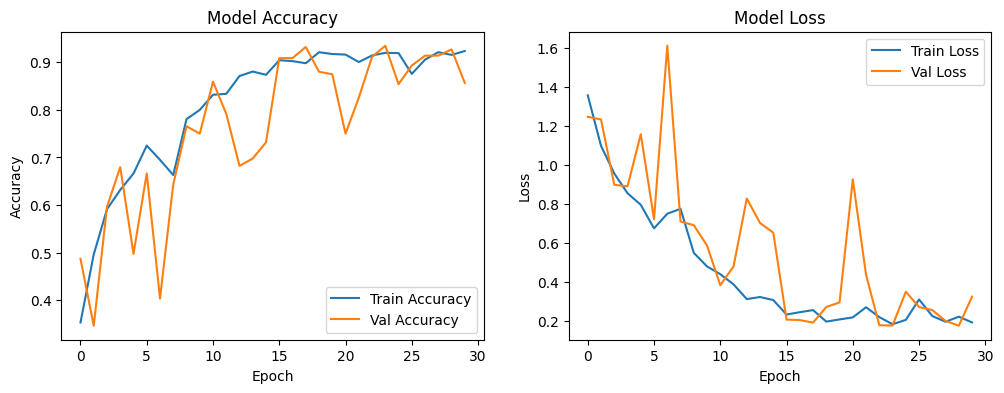

13/13 [==============================] - 40s 2s/step


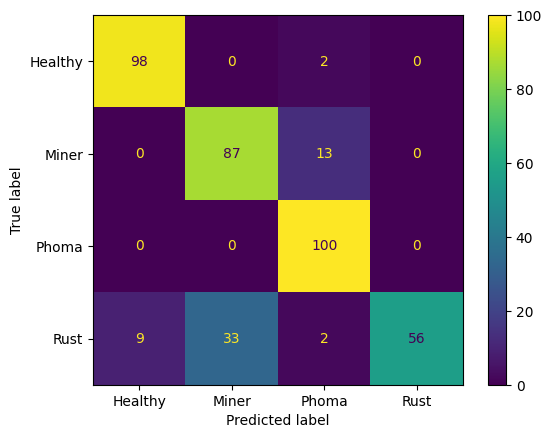

In [13]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot()
plt.show()

In [ ]:
model.save('custom_coffee_leaf_disease_model.h5')
print("Model saved as 'custom_coffee_leaf_disease_model.h5'")

/home/cs/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
img_path = 'dataset/test/Miner/20.jpg'  # Change this
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_names = list(train_generator.class_indices.keys())
predicted_class = class_names[np.argmax(prediction)] #np.argmax: Picks the highest probability’s position (e.g., 3 for Rust in [0.1, 0.05, 0.2, 0.65]).
print(f"Predicted class: {predicted_class}")

NameError: name 'model' is not defined

In [10]:
from tensorflow.keras.models import load_model

In [11]:
# Load the model from the file
model = load_model('custom_coffee_leaf_disease_model.h5')
print("Model loaded successfully!")

2025-03-18 21:07:11.852447: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2025-03-18 21:07:11.992976: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2025-03-18 21:07:12.199088: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2025-03-18 21:07:17.245460: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2025-03-18 21:07:17.434500: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.


Model loaded successfully!


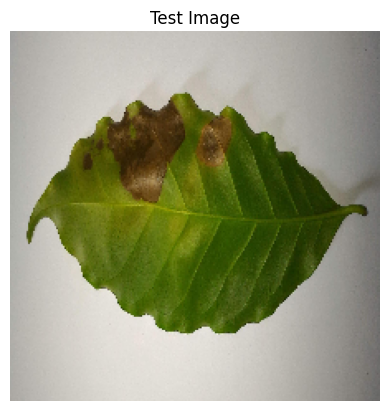

In [12]:
# Size the CNN expects (from training)
IMG_SIZE = (224, 224)

# Path to your test picture (change this!)
img_path = 'dataset/test/Miner/21.jpg'  # Example: 'test_leaf.jpg' or 'C:/Pictures/leaf1.jpg'

# Load the picture and resize it
img = image.load_img(img_path, target_size=IMG_SIZE)

# Show the picture
plt.imshow(img)
plt.title("Test Image")
plt.axis('off')  # Hide numbers on the sides
plt.show()

# Turn the picture into numbers
img_array = image.img_to_array(img)  # Makes it a grid of numbers (224x224x3)
img_array = img_array / 255.0  # Changes colors from 0–255 to 0–1 (like training)
img_array = np.expand_dims(img_array, axis=0)  # Adds a "batch" layer (1x224x224x3)

In [ ]:


prediction = model.predict(img_array)

# List of possible answers
class_names = ['Healthy', 'Miner', 'Phoma', 'Rust']  

# Find the best guess
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction) * 100  # How sure it is (in %)

# Show the result
print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")

1/1 [==============================] - 3s 3s/step
Predicted class: Miner
Confidence: 98.89%


In [ ]:
IMG_SIZE = (224, 224)
class_names = ['Healthy', 'Miner', 'Phoma', 'Rust']
t=0
f=0

for img in os.listdir('dataset/test/Miner'):
    

# Path to your test picture 
    img_path = f'dataset/test/Miner/{img}'

    # Load the picture and resize it
    img = image.load_img(img_path, target_size=IMG_SIZE)

    

    # Turn the picture into numbers
    img_array = image.img_to_array(img)  
    img_array = img_array / 255.0  # Changes colors from 0–255 to 0–1 like training
    img_array = np.expand_dims(img_array, axis=0) 


    prediction = model.predict(img_array)



# Find the best guess
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100  # How sure it is (in %)

# Show the result
    if predicted_class=='Miner':
        t+=1
    else:
        f+=1
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")

print(f"true: {t}")
print(f"false: {f}")
    

1/1 [==============================] - 0s 148ms/step
Predicted class: Miner
Confidence: 99.28%
1/1 [==============================] - 0s 143ms/step
Predicted class: Miner
Confidence: 99.84%
1/1 [==============================] - 0s 120ms/step
Predicted class: Miner
Confidence: 71.69%
1/1 [==============================] - 0s 90ms/step
Predicted class: Miner
Confidence: 99.24%
1/1 [==============================] - 0s 104ms/step
Predicted class: Phoma
Confidence: 99.87%
1/1 [==============================] - 0s 117ms/step
Predicted class: Miner
Confidence: 99.77%
1/1 [==============================] - 0s 102ms/step
Predicted class: Miner
Confidence: 99.96%
1/1 [==============================] - 0s 112ms/step
Predicted class: Miner
Confidence: 98.28%
1/1 [==============================] - 0s 92ms/step
Predicted class: Miner
Confidence: 98.08%
1/1 [==============================] - 0s 128ms/step
Predicted class: Miner
Confidence: 82.78%
1/1 [==============================] - 0s 165ms/step